In [2]:
!pip install tensorflow
!pip install keras

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)


In [51]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [52]:
# Generate synthetic data using the make_circles function from sklearn.datasets
x, y = make_circles(n_samples=1000, noise=0.03)


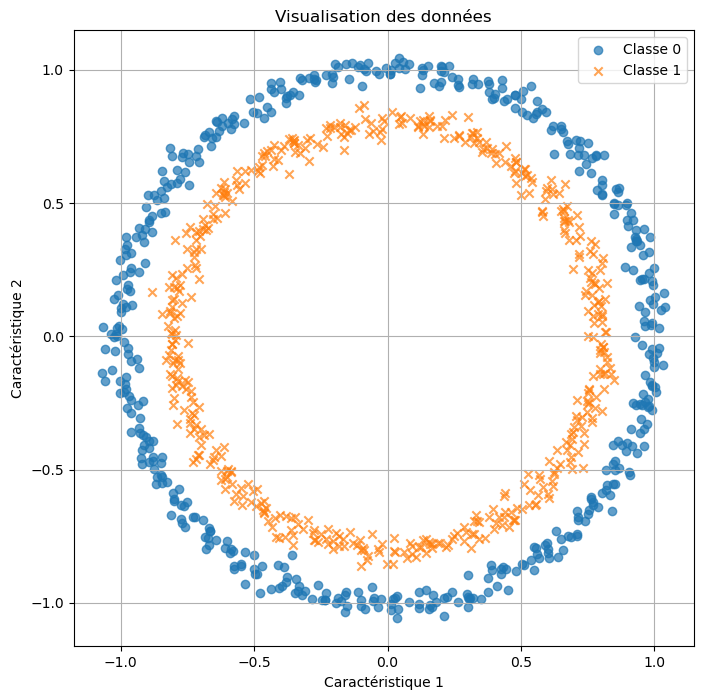

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(x[y == 0, 0], x[y == 0, 1], label='Classe 0', marker='o', alpha=0.7)
plt.scatter(x[y == 1, 0], x[y == 1, 1], label='Classe 1', marker='x', alpha=0.7)

plt.title('Visualisation des données')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
y = y.reshape(y.shape[0],1)

In [55]:
print("Samples number : " , x.shape[0])
print("Input dimension : " , x.shape[1])
print("Output dimension : " ,y.shape[0])

Samples number :  1000
Input dimension :  2
Output dimension :  1000


In [56]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("X_train shape :" , X_train.shape)
print("y_train shape :" , y_train.shape)
print("X_test shape :" , X_test.shape)
print("y_test shape :" , y_test.shape)

X_train shape : (800, 2)
y_train shape : (800, 1)
X_test shape : (200, 2)
y_test shape : (200, 1)


# Model definition

In [108]:
X_train = X_train.T

In [109]:
X_test = X_test.T

In [57]:
# Define a function to create a neural network model
def create_model(input_shape, neuron_nb):
    # Create a Sequential model
    our_model = Sequential()
    
    # Add a dense layer with ReLU activation function and the specified number of neurons
    # Input shape is specified by the input_shape parameter
    our_model.add(Dense(neuron_nb, activation='relu', input_shape=input_shape))
    
    # Add a dense output layer with sigmoid activation function
    our_model.add(Dense(1, activation='sigmoid'))
    
    # Return the created model
    return our_model


In [58]:
model = create_model((X_train.shape[1],),5)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
optimiser = keras.optimizers.SGD()

model.compile(optimizer= optimiser,loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5779 - loss: 0.6673 - val_accuracy: 0.5200 - val_loss: 0.6799
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5842 - loss: 0.6681 - val_accuracy: 0.5200 - val_loss: 0.6798
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5915 - loss: 0.6660 - val_accuracy: 0.5200 - val_loss: 0.6797
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6103 - loss: 0.6651 - val_accuracy: 0.5200 - val_loss: 0.6796
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.6660 - val_accuracy: 0.5200 - val_loss: 0.6795
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5786 - loss: 0.6656 - val_accuracy: 0.5250 - val_loss: 0.6794
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 0.6667 - val_accuracy: 0.5250 - val_loss: 0.6792
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.6612 - val_accuracy: 0.5250 - v

In [66]:
#model evaluation
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
loss_val = history.history['val_loss']

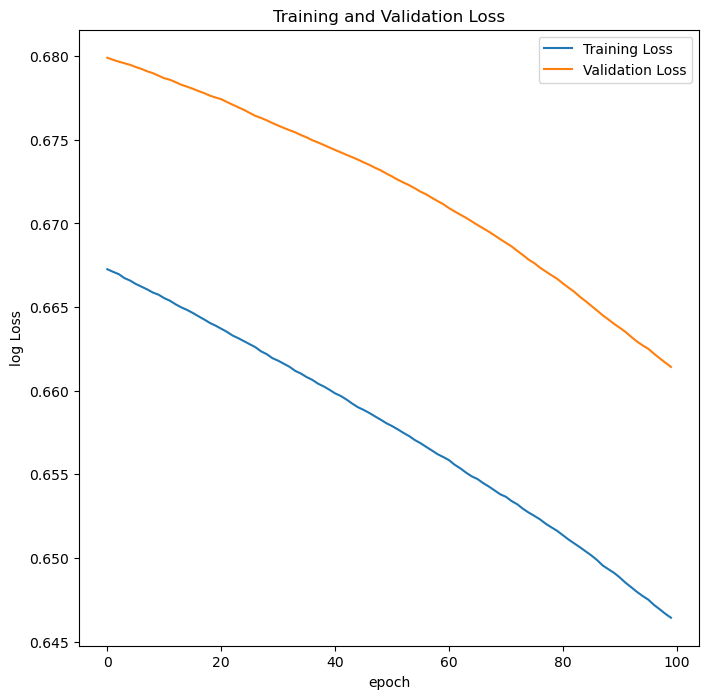

In [67]:
#training and validation loss
plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(loss_val, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('log Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

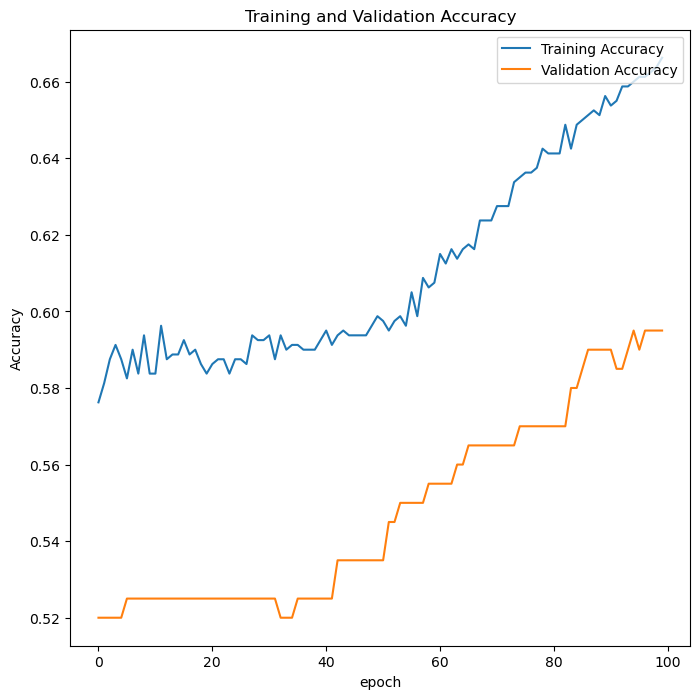

In [68]:
#training and validation accuracy
plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(acc_val, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

In [69]:
predictions = model.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


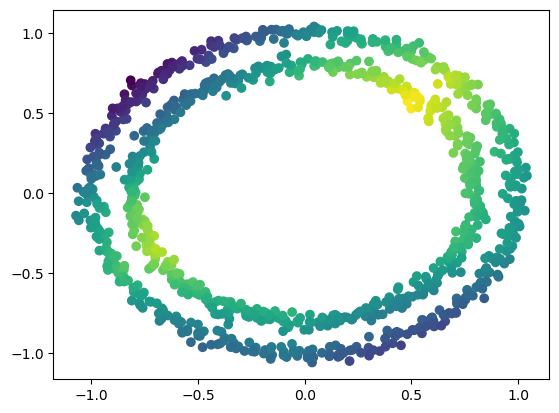

In [70]:
plt.scatter(x[:,0],x[:,1],c=predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


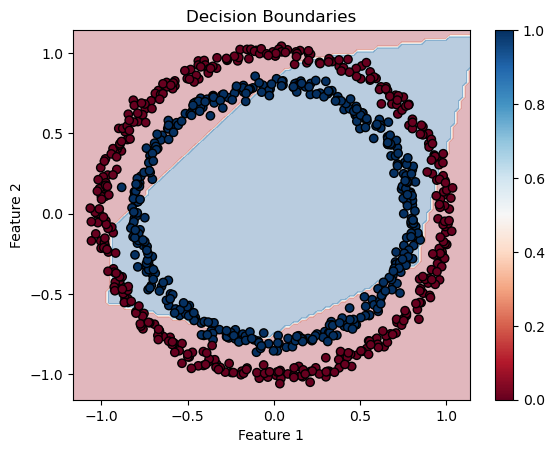

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a meshgrid of points covering the range of your input data
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Step 2: Generate predictions for each point in the meshgrid
meshgrid_input = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(meshgrid_input)
predictions = np.round(predictions).reshape(xx.shape)

# Step 3: Plot the decision boundaries
plt.contourf(xx, yy, predictions, cmap=plt.cm.RdBu, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries')
plt.colorbar()
plt.show()


In [72]:
new_model = create_model((X_train.shape[1],),100)
new_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
optimiser = keras.optimizers.SGD()
new_model.compile(optimizer= optimiser,loss='binary_crossentropy',metrics=['accuracy'])
history = new_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,batch_size=32)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4871 - loss: 0.7024 - val_accuracy: 0.5050 - val_loss: 0.6991
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4511 - loss: 0.7064 - val_accuracy: 0.5150 - val_loss: 0.6990
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4867 - loss: 0.6985 - val_accuracy: 0.5150 - val_loss: 0.6991
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4640 - loss: 0.6996 - val_accuracy: 0.5150 - val_loss: 0.6992
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 0.6975 - val_accuracy: 0.4450 - val_loss: 0.6994
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4373 - loss: 0.6964 - val_accuracy: 0.4250 - val_loss: 0.6995
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4819 - loss: 0.6959 - val_accuracy: 0.3700 - val_loss: 0.6996
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4592 - loss: 0.6949 - val_accuracy: 0.

In [74]:
def plot_loss_acc(history):
    acc = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    loss = history.history['loss']
    loss_val = history.history['val_loss']
    plt.figure(figsize=(12, 8))
    plt.subplot(1,2,1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(acc_val, label='Validation Accuracy')
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('epoch')
    plt.subplot(1,2,2)
    plt.plot(loss, label='Training Loss')
    plt.plot(loss_val, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

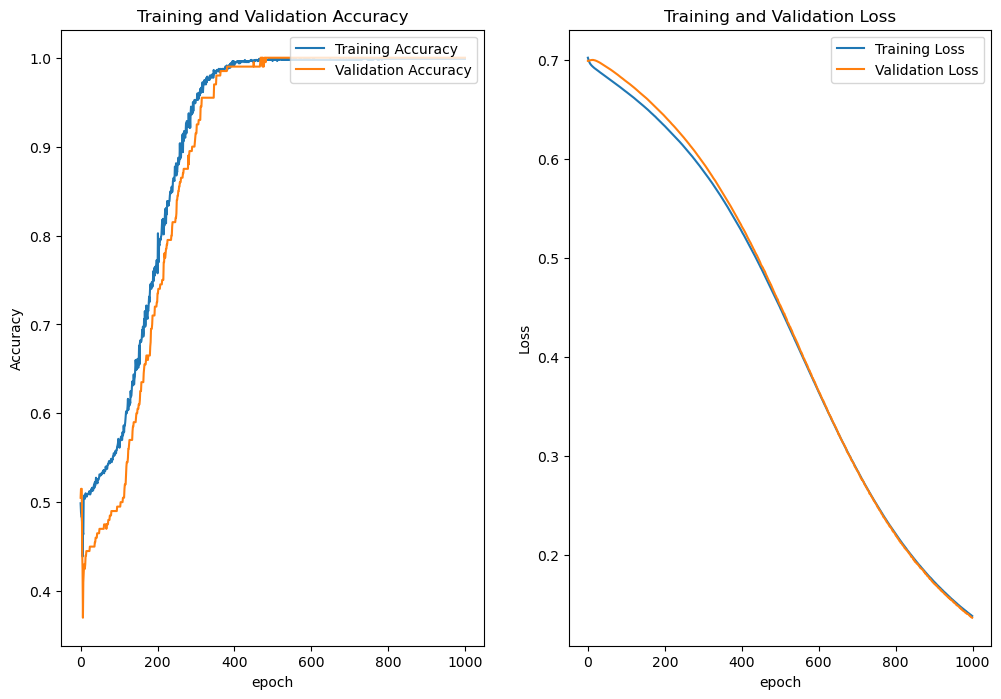

In [75]:
plot_loss_acc(history)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


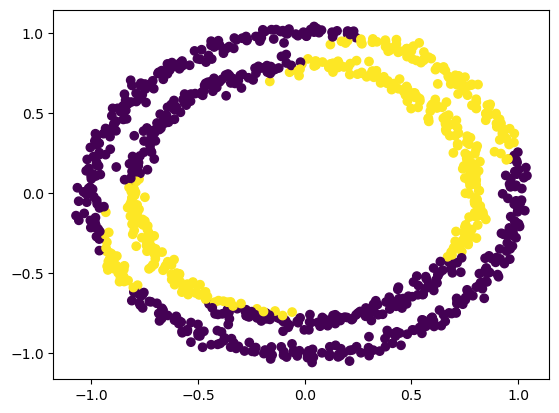

In [76]:
predictions = model.predict(x)
predictions = predictions > 0.5
plt.scatter(x[:,0],x[:,1],c=predictions)

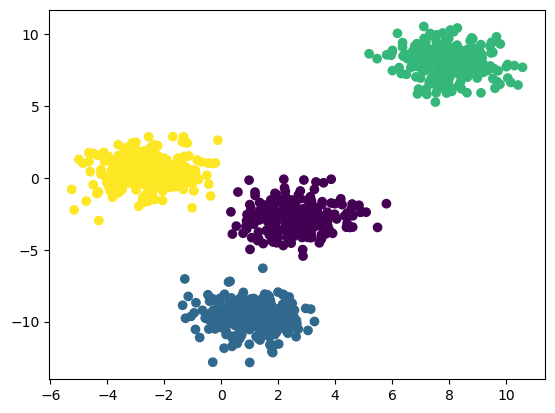

In [90]:
from sklearn.datasets import make_blobs

xx , yy = make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=1)
plt.scatter(xx[:,0],xx[:,1],c=yy)

In [25]:
import numpy as np

In [91]:
# Convert labels y into one-hot encoded vectors
Yy = np.eye(4)[yy]

In [103]:
XX_train , XX_test , yy_train , yy_test = train_test_split(xx,Yy,test_size=0.2,random_state=42)
print("X_train shape :" , XX_train.shape)
print("y_train shape :" , yy_train.shape)
print("X_test shape :" , XX_test.shape)
print("y_test shape :" , yy_test.shape)

X_train shape : (800, 2)
y_train shape : (800, 4)
X_test shape : (200, 2)
y_test shape : (200, 4)


In [95]:
def multiclass_model(input_shape,nbr_neurone):
    our_model = Sequential()
    our_model.add(Dense(nbr_neurone,activation='relu',input_shape=input_shape))
    our_model.add(Dense(nbr_neurone//2,activation='relu'))
    our_model.add(Dense(4,activation='softmax'))
    return our_model

In [97]:
multi_model = multiclass_model((xx.shape[1],),100)
multi_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,554 (21.70 KB)

 Trainable params: 5,554 (21.70 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
optimiser = keras.optimizers.SGD()

multi_model.compile(optimizer= optimiser,loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
history = multi_model.fit(XX_train,yy_train,validation_data=(XX_test,yy_test),epochs=100,batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5512 - loss: 1.0138 - val_accuracy: 0.8250 - val_loss: 0.6078
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8981 - loss: 0.5154 - val_accuracy: 0.9600 - val_loss: 0.4242
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.3679 - val_accuracy: 0.9750 - val_loss: 0.3242
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.2909 - val_accuracy: 0.9800 - val_loss: 0.2590
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.2245 - val_accuracy: 0.9800 - val_loss: 0.2148
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9866 - loss: 0.1788 - val_accuracy: 0.9850 - val_loss: 0.1810
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.1601 - val_accuracy: 0.9850 - val_loss: 0.1570
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.1411 - val_accuracy: 0.9900 - v

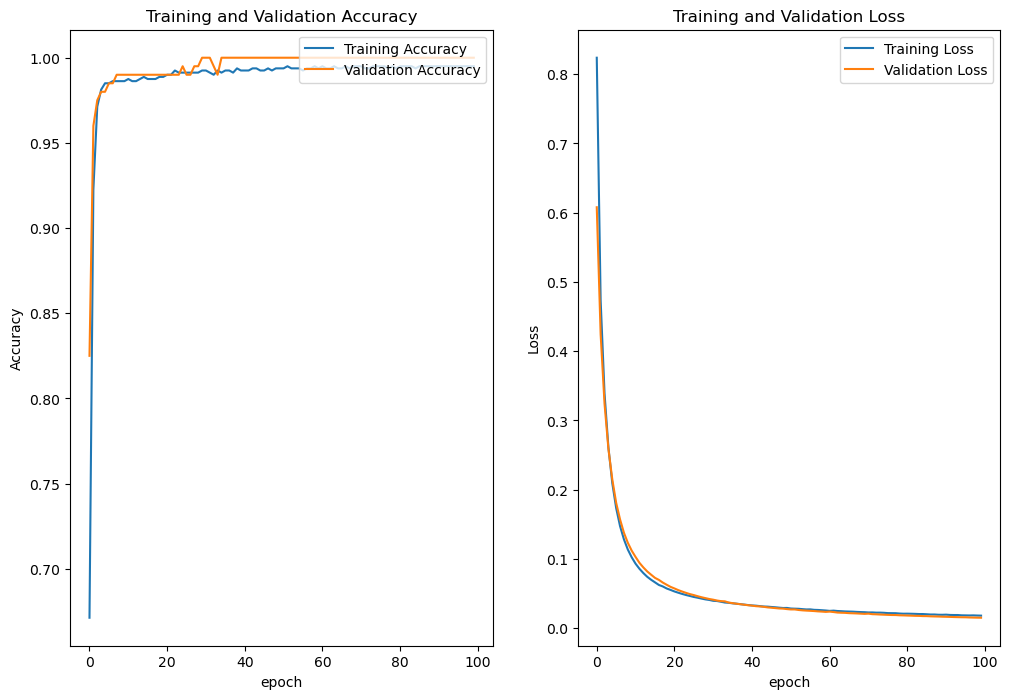

In [100]:
plot_loss_acc(history)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step


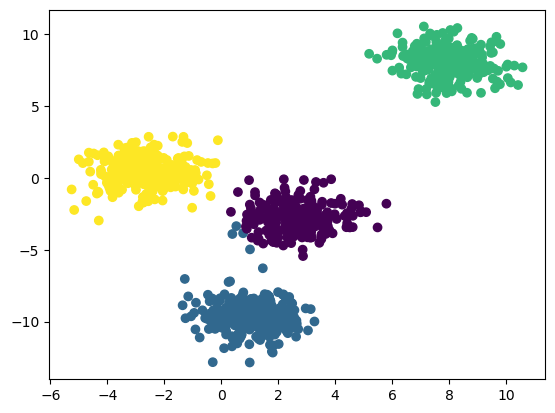

In [108]:
predictions = multi_model.predict(xx)
predictions = np.argmax(predictions,axis=1)

plt.scatter(xx[:,0],xx[:,1],c=predictions)

141359/141359 ━━━━━━━━━━━━━━━━━━━━ 82s 579us/step


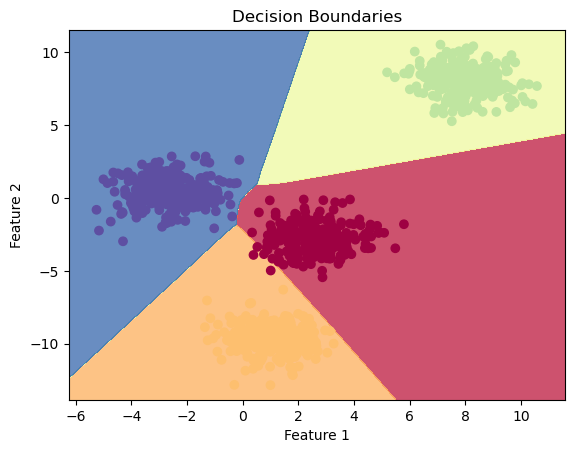

In [104]:
# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundaries')
    plt.show()

# Now you can use this function to plot decision boundaries for your multiclass model
plot_decision_boundary(multi_model, xx, yy)


In [110]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate and print classification report
print("Classification Report:")
print(classification_report(yy, predictions))

# Calculate and plot confusion matrix
conf_mat = confusion_matrix(yy, predictions)
print("Confusion Matrix:")
print(conf_mat)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       250
           1       0.98      1.00      0.99       250
           2       1.00      1.00      1.00       250
           3       1.00      1.00      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
[[246   4   0   0]
 [  0 250   0   0]
 [  0   0 250   0]
 [  0   0   0 250]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 1.0000 - loss: 4.5446e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 1.0000 - loss: 3.5482e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 1.0000 - loss: 3.0275e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 2.6116e-04 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9362e-04 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.8504e-04 


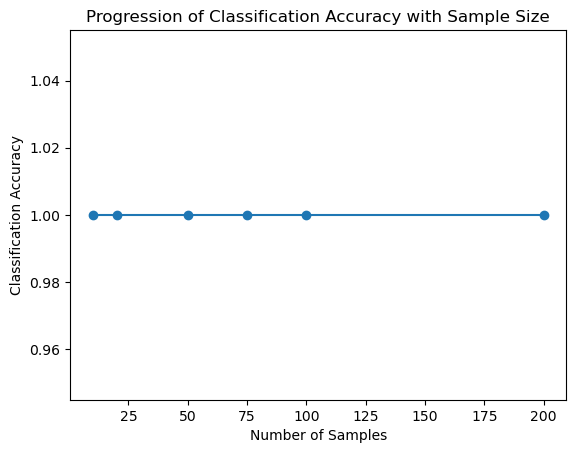

In [113]:
# Initialize lists to store accuracy and sample size
accuracy_list = []
sample_size_list = []

# Define a range of sample sizes to test
sample_sizes = [10, 20, 50, 75, 100, 200]  

for sample_size in sample_sizes:
    
    # Train the model using the synthetic data
    history = multi_model.fit(xx, Yy, epochs=100, batch_size=32, verbose=0)
    
    # Evaluate the model accuracy on the synthetic test data
    accuracy = multi_model.evaluate(XX_test, yy_test)[1]
    
    # Append accuracy and sample size to the lists
    accuracy_list.append(accuracy)
    sample_size_list.append(sample_size)

# Plot the progression curve of classification accuracy
plt.plot(sample_size_list, accuracy_list, marker='o')
plt.xlabel('Number of Samples')
plt.ylabel('Classification Accuracy')
plt.title('Progression of Classification Accuracy with Sample Size')
plt.show()